# **Membangun Model Deteksi Penipuan (Fraud) Kartu Kredit dengan Teknik Machine Learning**

## Tanggal 30 Oktober 2023

## Kelompok 3
1. Boy Aditya Rohmaulana (2203488)
2. Defrizal Yahdiyan Risyad (2206131)
3. Muhamad Furqon Al-Haqqi (2207207)
4. Raya Cahya Nurani (2205714)
5. Septiani Eka Putri (2206000

## Pendahuluan
Dulu, ketika kartu kredit  tidak menggunakan kode chip dan PIN, sering terjadi penyalahgunaan kartu kredit oleh pihak yang tidak berkepentingan. Misalnya, jika kartu kredit kita dicuri atau hilang, penjahat bisa langsung menggunakannya. Selain itu, beberapa tempat membuat salinan kartu kredit secara ilegal sebelum penggunaan chip diterapkan, dan salinan tersebut kemudian digunakan untuk pembelian.  

Berbeda dengan kartu debit yang langsung mengurangi saldo rekening, pembayaran kartu kredit diawasi oleh bank dan harus diotorisasi terlebih dahulu. Oleh karena itu, bank sangat berkepentingan untuk mencegah penyalahgunaan kartu kredit agar tidak terjadi kerugian finansial.

Dalam konteks ini, notebook ini bertujuan untuk melakukan eksplorasi data dan membangun model deteksi transaksi penipuan menggunakan teknik machine learning. Dengan memanfaatkan teknologi machine learning, kita dapat memproses dan menganalisis data transaksi dengan lebih efisien untuk mengidentifikasi pola-pola penipuan yang sulit dikenali oleh metode konvensional. Model ini diharapkan dapat memberikan kontribusi positif dalam melindungi keuangan konsumen dan institusi keuangan dari ancaman penyalahgunaan kartu kredit.

## Preparation

Import library

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Import Dataset

In [6]:
train = pd.read_csv("fraud_train.txt")

## 1. Data Understanding

Melihat dimensi data

In [7]:
print('Dimensi data: ', train.shape)

Dimensi data:  (13125, 28)


In [8]:
# Mengatur display maksimum kolom yang bisa ditampilkan
pd.set_option('display.max_columns', 28) 

In [9]:
train.head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,96,5,265,4137,613,193955,4,2,1,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,96,5,121,1264,2196,73140,2,1,5,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,96,5,101,1283,2049,140216,3,1,5,8,False,3,999,1.552346e+07,100000000.0,41804.0,2.40,0
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,96,5,239,7049,588,155117,3,2,2,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,96,5,69,3425,613,143339,3,2,1,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0


In [10]:
train.columns

Index(['X', 'id_tanggal_transaksi_awal', 'tanggal_transaksi_awal',
       'tipe_kartu', 'id_merchant', 'nama_merchant', 'tipe_mesin',
       'tipe_transaksi', 'nama_transaksi', 'nilai_transaksi', 'id_negara',
       'nama_negara', 'nama_kota', 'lokasi_mesin', 'pemilik_mesin',
       'waktu_transaksi', 'kuartal_transaksi', 'kepemilikan_kartu',
       'nama_channel', 'id_channel', 'flag_transaksi_finansial',
       'status_transaksi', 'bank_pemilik_kartu', 'rata_rata_nilai_transaksi',
       'maksimum_nilai_transaksi', 'minimum_nilai_transaksi',
       'rata_rata_jumlah_transaksi', 'flag_transaksi_fraud'],
      dtype='object')

### Penjelasan Fitur
- **X**
- **id_tanggal_transaksi_awal**         
Identifier atau kode yang digunakan untuk mengidentifikasi tanggal awal terjadinya suatu transaksi.
- **tanggal_transaksi_awal**              
Tanggal sebenarnya ketika transaksi dilakukan. Informasi ini berguna untuk melacak waktu dan urutan transaksi serta menganalisis tren transaksi seiring berjalannya waktu.
- **tipe_kartu**                        
Mencakup jenis kartu kredit yang digunakan dalam transaksi, seperti jenis kartu kredit tertentu (Visa, MasterCard, American Express, dsb), dan atribut ini dapat membantu dalam analisis jenis kartu yang lebih rentan terhadap penyalahgunaan.
- **id_merchant**                   
Kode atau identifikasi unik untuk setiap pedagang yang terlibat dalam transaksi. Identifikasi ini membantu dalam menghubungkan transaksi dengan pedagang tertentu.
- **nama_merchant**                 
Nama pedagang atau bisnis yang melakukan transaksi. Informasi ini berguna dalam melacak transaksi ke pedagang tertentu dan menilai apakah pedagang tersebut terkait dengan aktivitas penipuan.
- **tipe_mesin**                           
Informasi mengenai jenis mesin yang digunakan untuk memproses transaksi, yang dapat bervariasi tergantung pada pedagang dan teknologi yang digunakan.
- **tipe_transaksi**                      
Tanggal sebenarnya ketika transaksi dilakukan. Informasi ini berguna untuk melacak waktu dan urutan transaksi serta menganalisis tren transaksi seiring berjalannya waktu.
- **nama_transaksi**                    
Deskripsi atau nama yang lebih rinci tentang transaksi yang dilakukan, seperti "Pembelian di Toko A" atau "Penarikan ATM".
- **nilai_transaksi**                       
Jumlah uang yang terlibat dalam transaksi tersebut. Informasi ini sangat penting dalam mengidentifikasi pola transaksi yang mencurigakan, terutama jika ada transaksi dengan nilai yang tidak wajar.
- **id_negara**                             
Identifier atau kode yang digunakan untuk mengidentifikasi negara di mana transaksi tersebut dilakukan.
- **nama_negara**                           
Nama negara tempat transaksi berlangsung. Informasi ini membantu dalam melacak transaksi lintas batas dan mengidentifikasi aktivitas yang mencurigakan dari negara tertentu.
- **nama_kota**                             
Nama kota atau lokasi di mana transaksi terjadi.
- **lokasi_mesin**                      
Lokasi fisik dari mesin atau terminal yang digunakan dalam transaksi, seperti alamat atau koordinat geografis.
- **pemilik_mesin**                 
Entitas atau individu yang memiliki atau mengoperasikan mesin atau terminal yang digunakan dalam transaksi.
- **waktu_transaksi**                   
Waktu sebenarnya ketika transaksi terjadi. Informasi ini berguna untuk menganalisis pola transaksi harian atau seiring berjalannya waktu.
- **kuartal_transaksi**                     
Penunjuk waktu yang menunjukkan transaksi berada dalam kuartal tahun berapa. Berguna untuk analisis waktu yang lebih besar.
- **kepemilikan_kartu**                         
Status kepemilikan kartu kredit, apakah kartu tersebut dimiliki oleh individu yang melakukan transaksi atau apakah kartu tersebut hilang atau dicuri.
- **nama_channel**                          
Saluran atau metode yang digunakan untuk melakukan transaksi, seperti mesin ATM, toko ritel, atau transaksi online.
- **id_channel**                            
Kode identifikasi untuk setiap saluran atau metode transaksi yang digunakan.
- **flag_transaksi_finansial**                  
Penanda yang menunjukkan apakah transaksi tersebut termasuk dalam kategori finansial atau non-finansial, seperti pembelian barang atau pembayaran tagihan.
- **status_transaksi**                      
Status transaksi, seperti "berhasil," "gagal," atau "ditolak."
- **bank_pemilik_kartu**                    
Lembaga keuangan atau bank yang menerbitkan kartu kredit yang digunakan dalam transaksi.
- **rata_rata_nilai_transaksi**                 
Rata-rata dari nilai transaksi selama periode waktu tertentu, yang dapat membantu dalam menganalisis tren atau perubahan dalam nilai transaksi.
- **maksimum_nilai_transaksi**                  
Nilai transaksi tertinggi yang tercatat dalam data transaksi.
- **minimum_nilai_transaksi**                   
Nilai transaksi terendah yang tercatat dalam data transaksi.
- **rata_rata_jumlah_transaksi**                
Rata-rata jumlah transaksi yang dilakukan selama periode waktu tertentu.
- **flag_transaksi_fraud**                      
Penanda yang menunjukkan apakah transaksi tersebut diidentifikasi sebagai transaksi penipuan atau bukan. Ini adalah atribut penting dalam menangani permasalahan penyalahgunaan kartu kredit dan mencegahnya.

Melihat Informasi Data

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   X                           13125 non-null  int64  
 1   id_tanggal_transaksi_awal   13125 non-null  int64  
 2   tanggal_transaksi_awal      13125 non-null  int64  
 3   tipe_kartu                  13125 non-null  int64  
 4   id_merchant                 13125 non-null  int64  
 5   nama_merchant               13125 non-null  int64  
 6   tipe_mesin                  13125 non-null  int64  
 7   tipe_transaksi              13125 non-null  int64  
 8   nama_transaksi              13125 non-null  int64  
 9   nilai_transaksi             13125 non-null  float64
 10  id_negara                   13125 non-null  int64  
 11  nama_negara                 13125 non-null  int64  
 12  nama_kota                   13125 non-null  int64  
 13  lokasi_mesin                131

Melihat Ringkasan Statistik Deskriptif

In [12]:
train.describe()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
count,13125.000000,1.312500e+04,1.312500e+04,13125.000000,13125.000000,13125.000000,1.312500e+04,13125.000000,13125.000000,1.312500e+04,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.0,13125.0,1.310400e+04,1.310400e+04,1.310400e+04,13104.000000,13125.000000
mean,7507.821943,2.457490e+06,2.457541e+06,85.340114,39300.900876,1678.483886,1.649037e+06,178.778362,10.729524,1.315219e+06,96.057981,5.019581,148.295543,3947.520457,766.033448,138895.669638,2.854857,1.932267,1.404267,8.237410,3.0,999.0,1.364132e+06,1.228760e+07,7.651933e+04,2.436182,0.069333
std,4326.959832,1.047995e+02,1.088401e+02,40.921347,124187.745686,361.236161,9.914309e+05,142.504458,3.891783,2.838050e+06,3.566912,0.417351,70.112724,2405.917886,466.132889,47872.569599,0.825276,0.251297,1.013583,1.721997,0.0,0.0,1.448583e+06,1.645905e+07,6.765391e+05,1.389367,0.254030
min,1.000000,2.457297e+06,2.457303e+06,0.000000,-2.000000,2.000000,-4.000000e+00,26.000000,1.000000,1.000000e+00,-2.000000,1.000000,1.000000,2.000000,1.000000,47.000000,1.000000,1.000000,1.000000,3.000000,3.0,999.0,5.000000e+04,3.800000e+04,1.000000e+00,1.000000,0.000000
25%,3784.000000,2.457404e+06,2.457451e+06,93.000000,-2.000000,1798.000000,1.130699e+06,26.000000,9.000000,2.000000e+05,96.000000,5.000000,102.000000,1914.000000,613.000000,102622.000000,2.000000,2.000000,1.000000,9.000000,3.0,999.0,5.685634e+05,2.500000e+06,2.500000e+04,1.680000,0.000000
50%,7475.000000,2.457500e+06,2.457543e+06,103.000000,-2.000000,1798.000000,1.836319e+06,156.000000,10.000000,5.700000e+05,96.000000,5.000000,128.000000,3720.000000,613.000000,140707.000000,3.000000,2.000000,1.000000,9.000000,3.0,999.0,1.024239e+06,6.000000e+06,3.696400e+04,2.100000,0.000000
75%,11265.000000,2.457581e+06,2.457632e+06,111.000000,-2.000000,1798.000000,2.419350e+06,301.000000,11.000000,1.250000e+06,96.000000,5.000000,203.000000,5637.000000,613.000000,175420.000000,3.000000,2.000000,1.000000,9.000000,3.0,999.0,1.679778e+06,1.500000e+07,6.320000e+04,2.790000,0.000000
max,15000.000000,2.457662e+06,2.457754e+06,138.000000,720990.000000,1859.000000,6.928943e+06,640.000000,20.000000,7.500000e+07,216.000000,16.000000,293.000000,8697.000000,2688.000000,235914.000000,4.000000,2.000000,5.000000,9.000000,3.0,999.0,2.466667e+07,1.000000e+08,7.500000e+07,19.780000,1.000000


## 2. Data Preparation

- Menghapus kolom yang tidak relevan
- Memeriksa data duplikat
- Nilai hilang/rusak
- Tipe data

### **Menghapus kolom yang tidak relevan**

In [13]:
train.head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,96,5,265,4137,613,193955,4,2,1,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,96,5,121,1264,2196,73140,2,1,5,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,96,5,101,1283,2049,140216,3,1,5,8,False,3,999,1.552346e+07,100000000.0,41804.0,2.40,0
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,96,5,239,7049,588,155117,3,2,2,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,96,5,69,3425,613,143339,3,2,1,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0


#### Menghapus Kolom yang memiliki nilai yang sama.
Kolom yang memiliki nilai yang sama untuk setiap baris tidak memberikan informasi yang bermanfaat dalam analisis

In [14]:
# Fungsi untuk mengecek kolom mana saja yang memiliki semua nilai sama
def kolom_semua_nilai_sama(train):
    kolom_sama = []
    for kolom in train.columns:
        if train[kolom].nunique() == 1:
            kolom_sama.append(kolom)
    return kolom_sama


kolom_semua_sama = kolom_semua_nilai_sama(train)
print(f"Kolom dengan semua nilai sama: {kolom_semua_sama}")

Kolom dengan semua nilai sama: ['flag_transaksi_finansial', 'status_transaksi', 'bank_pemilik_kartu']


In [15]:
train.drop(columns=kolom_semua_sama, inplace=True)

#### Menghapus Kolom yang Mungkin Berlebihan
Kolom-kolom ini memiliki banyak nilai unik dan mungkin tidak memberikan informasi yang signifikan

In [16]:
train.drop(columns=['X', 'id_tanggal_transaksi_awal', 'tipe_mesin', 'lokasi_mesin', 'pemilik_mesin'], inplace=True)

#### Menghapus Kolom yang Redundan
Kolom-kolom ini memberikan informasi yang sama atau sangat mirip dengan kolom lain dalam dataset.

In [17]:
train.drop(columns=['id_merchant', 'nama_merchant', 'nama_negara', 'nama_transaksi', 'nama_channel'], inplace=True)

### **Memeriksa Data Duplikat**

In [18]:
train[train.duplicated()]

,tanggal_transaksi_awal,tipe_kartu,tipe_transaksi,nilai_transaksi,id_negara,nama_kota,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,id_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud


Tidak ada data yang duplikat

### **Memeriksa data yang hilang atau null**

Melihat jumlah data yang null

In [19]:
train.isna().sum()

tanggal_transaksi_awal         0
tipe_kartu                     0
tipe_transaksi                 0
nilai_transaksi                0
id_negara                      0
nama_kota                      0
waktu_transaksi                0
kuartal_transaksi              0
kepemilikan_kartu              0
id_channel                     0
rata_rata_nilai_transaksi     21
maksimum_nilai_transaksi      21
minimum_nilai_transaksi       21
rata_rata_jumlah_transaksi    21
flag_transaksi_fraud           0
dtype: int64

Terdapat 21 baris data yang memiliki nilai null pada kolom-kolom tersebut, yang dimana kolom-kolom tersebut adalah kolom yang sangat membantu kemampuan klasifikasi sebuah model. Hal yang bisa dilakukan adalah menghapusnya atau imputasi nilai. Pertimbangannya adalah jika dilakukan imputasi nilai pada kolom-kolom tersebut, dikhawatirkan akan menyebabkan berkurangnya akurasi pada model. Sehingga diputuskan untuk menghapusnya saja, selain itu karena baris data yang akan terhapus pun cukup sedikit sehingga tidak terlalu mempengaruhi hasil.

In [20]:
train.dropna(inplace=True)

### **Tipe Data**

#### Melakukan konversi tipe data

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13104 entries, 0 to 13124
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tanggal_transaksi_awal      13104 non-null  int64  
 1   tipe_kartu                  13104 non-null  int64  
 2   tipe_transaksi              13104 non-null  int64  
 3   nilai_transaksi             13104 non-null  float64
 4   id_negara                   13104 non-null  int64  
 5   nama_kota                   13104 non-null  int64  
 6   waktu_transaksi             13104 non-null  int64  
 7   kuartal_transaksi           13104 non-null  int64  
 8   kepemilikan_kartu           13104 non-null  int64  
 9   id_channel                  13104 non-null  int64  
 10  rata_rata_nilai_transaksi   13104 non-null  float64
 11  maksimum_nilai_transaksi    13104 non-null  float64
 12  minimum_nilai_transaksi     13104 non-null  float64
 13  rata_rata_jumlah_transaksi  131

Mengubah kolom-kolom yang seharusnya memiliki tipe data kategori

In [22]:
kolom_kategori = [
    "tipe_kartu",
    "tipe_transaksi",
    "id_negara",
    "nama_kota",
    "kuartal_transaksi",
    "kepemilikan_kartu",
    "id_channel",
    "flag_transaksi_fraud",
]

train[kolom_kategori] = train[kolom_kategori].astype("category")


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13104 entries, 0 to 13124
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tanggal_transaksi_awal      13104 non-null  int64   
 1   tipe_kartu                  13104 non-null  category
 2   tipe_transaksi              13104 non-null  category
 3   nilai_transaksi             13104 non-null  float64 
 4   id_negara                   13104 non-null  category
 5   nama_kota                   13104 non-null  category
 6   waktu_transaksi             13104 non-null  int64   
 7   kuartal_transaksi           13104 non-null  category
 8   kepemilikan_kartu           13104 non-null  category
 9   id_channel                  13104 non-null  category
 10  rata_rata_nilai_transaksi   13104 non-null  float64 
 11  maksimum_nilai_transaksi    13104 non-null  float64 
 12  minimum_nilai_transaksi     13104 non-null  float64 
 13  rata_rata_jumlah

#### Format tanggal dan waktu

In [24]:
train[['tanggal_transaksi_awal', 'waktu_transaksi']]

,tanggal_transaksi_awal,waktu_transaksi
0,2457726,193955
1,2457507,73140
2,2457612,140216
3,2457746,155117
4,2457385,143339
...,...,...
13120,2457583,140547
13121,2457517,172446
13122,2457712,141836
13123,2457526,71451


Tanggal dan waktu tersebut tampaknya cukup sulit untuk diubah ke format yang lebih umum, sehingga untuk saat ini tanggal dan waktu tersebut akan diabaikan saja.

## 3. Analysis
- Analisis Target Variable
- Analisis Kategori
- Analisis Numerik

### **Analisis Target Variable**

Target variable di sini adalah "flag_transaksi_fraud" yang menunjukkan apakah suatu transaksi adalah penipuan (dengan nilai 1) atau bukan (dengan nilai 0). 

In [25]:
Total_transactions = len(train)
normal = len(train[train['flag_transaksi_fraud'] == 0])
fraudulent = len(train[train['flag_transaksi_fraud'] == 1])
fraud_percentage = round(fraudulent/Total_transactions*100, 2)
print('Jumlah total Transaksi adalah {}'.format(Total_transactions))
print('Jumlah Transaksi Normal adalah {}'.format(normal))
print('Jumlah transaksi fraud adalah {}'.format(fraudulent))
print('Persentase Transaksi Fraud adalah {}'.format(fraud_percentage))

Jumlah total Transaksi adalah 13104
Jumlah Transaksi Normal adalah 12210
Jumlah transaksi fraud adalah 894
Persentase Transaksi Fraud adalah 6.82


In [26]:
normal_percentage = round(normal/Total_transactions*100, 2)
print('Persentase Transaksi Normal adalah {}'.format(normal_percentage))

Persentase Transaksi Normal adalah 93.18


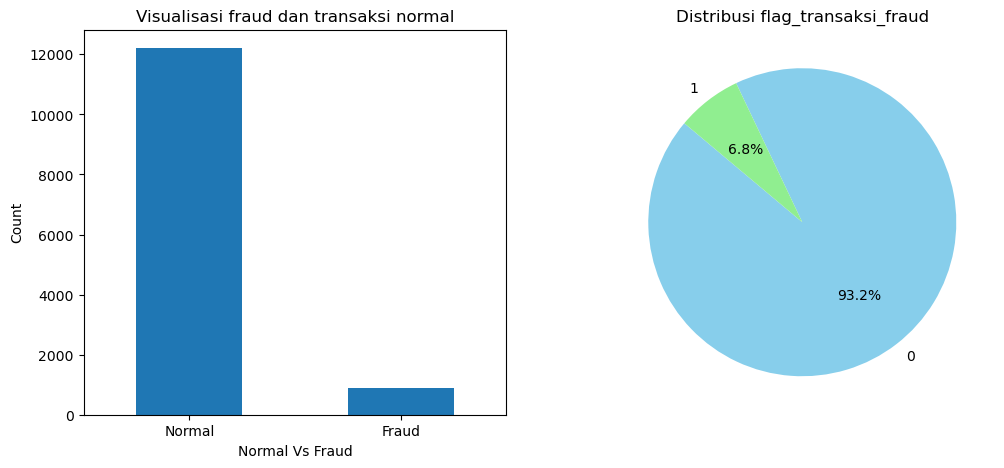

In [27]:
# Visualize
labels = ["Normal", "Fraud"]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
count_classes = train.value_counts(train['flag_transaksi_fraud'], sort=True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualisasi fraud dan transaksi normal")
plt.ylabel("Count")
plt.xlabel("Normal Vs Fraud")
plt.xticks(range(2), labels)

# Menghitung jumlah setiap nilai dalam kolom "flag_transaksi_fraud"
loan_status_counts = train['flag_transaksi_fraud'].value_counts()

# Membuat pie chart
plt.subplot(1, 2, 2)
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribusi flag_transaksi_fraud')
plt.show()

Seperti yang bisa kita lihat dari gambar di atas, terdapat perbedaan yang sangat besar antar transaksinya.

Hanya 6,82% (894) transaksi dalam dataset yang merupakan fraud yang menunjukkan ketidakseimbangan dalam dataset.

#### **Analisis Kategori**

#### Univariate Analysis

Univariate analysis adalah analisis statistik yang fokus pada satu variabel tunggal pada suatu waktu.

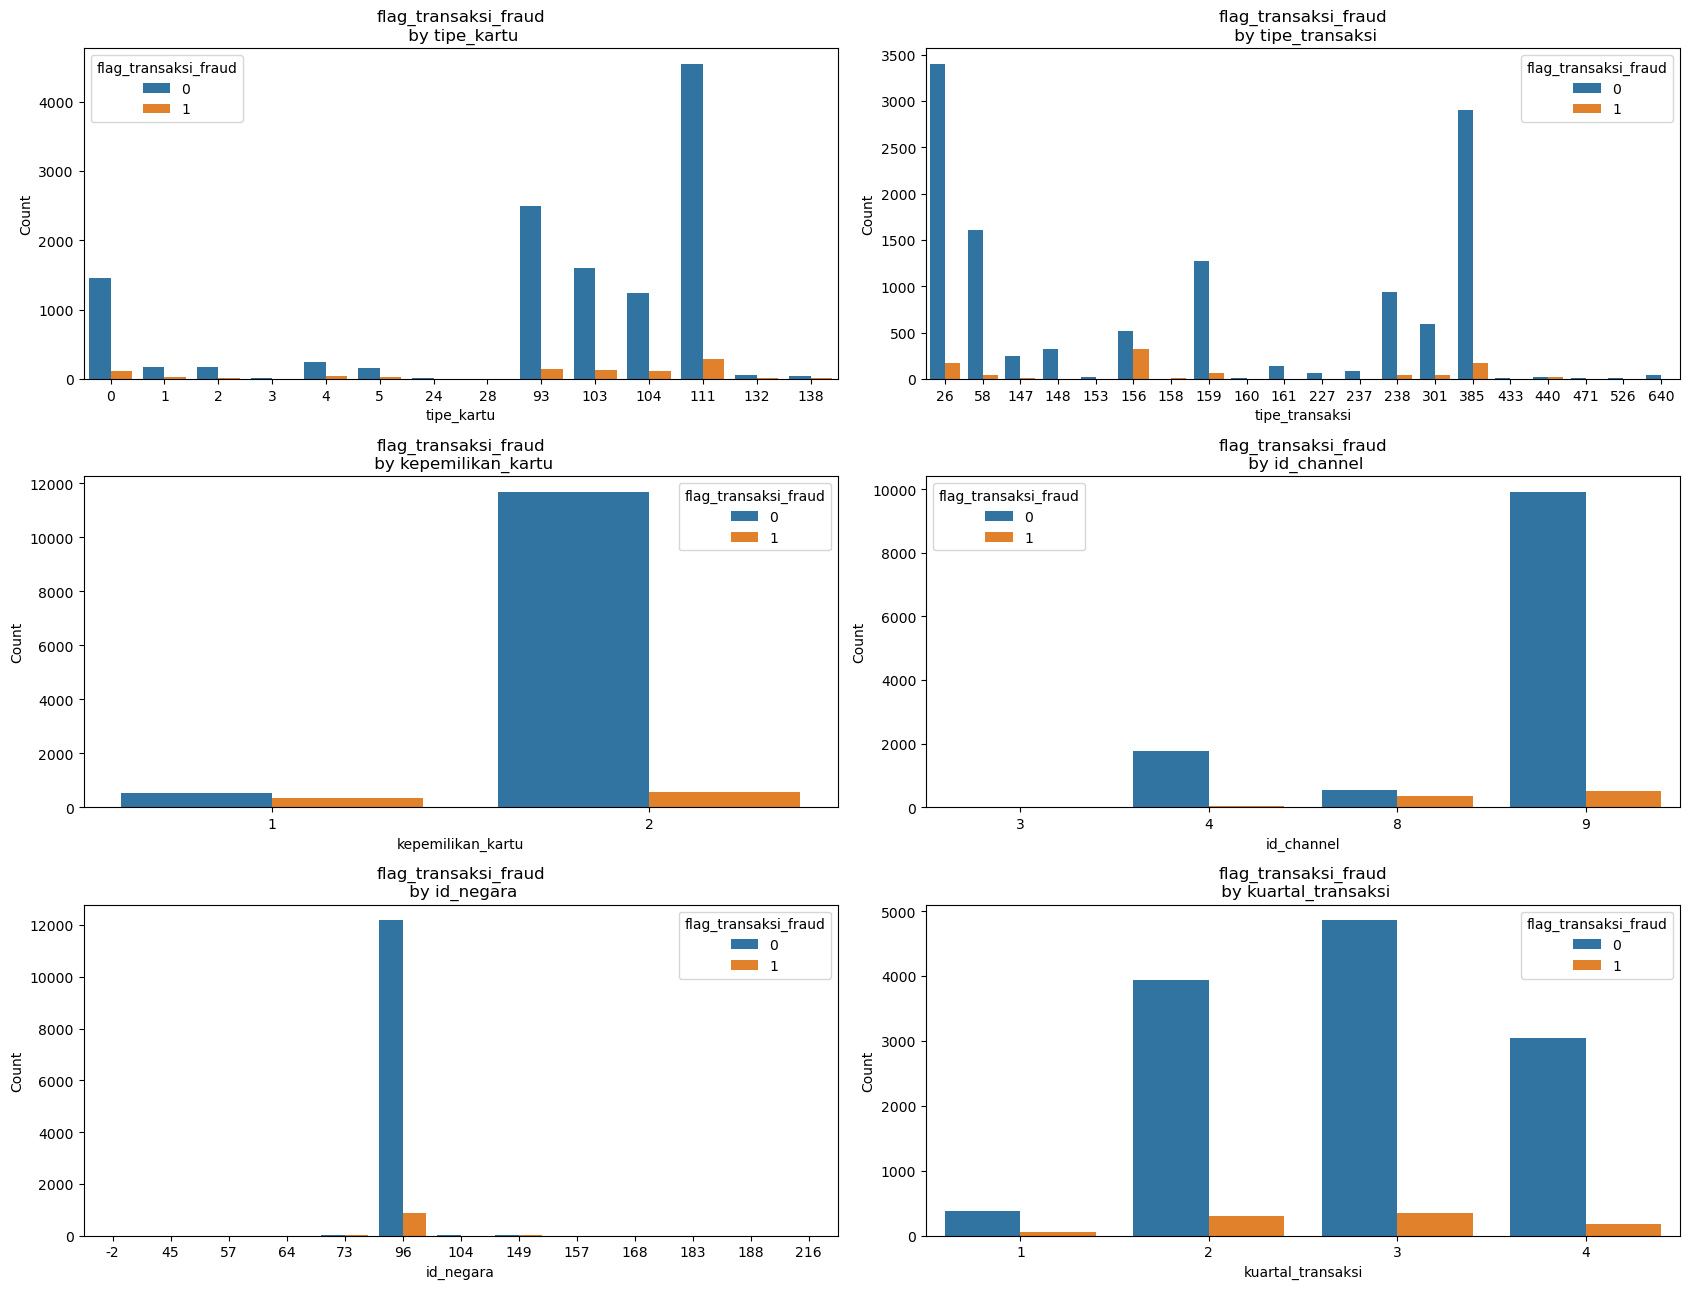

In [28]:
nominal_columns = ['tipe_kartu', 'tipe_transaksi', 'kepemilikan_kartu', 'id_channel', 'id_negara', 'kuartal_transaksi']

fig, axes = plt.subplots(3, 2, figsize=(17, 13))
for idx, cat_col in enumerate(nominal_columns):
    row, col = idx // 2, idx % 2
    sns.countplot(x=cat_col, data=train, hue='flag_transaksi_fraud', ax=axes[row, col])
    axes[row, col].set_title(f'flag_transaksi_fraud\n by {cat_col}')
    axes[row, col].set_xlabel(cat_col)
    axes[row, col].set_ylabel('Count')
    axes[row, col].legend(title='flag_transaksi_fraud')

plt.tight_layout()
plt.show()

Berikut adalah beberapa hal menarik yang dapat terlihat:
1. Pada fitur 'tipe_transaksi'. Pada fitur tersebut tipe transaksi "156" lebih cenderung terlibat dalam transaksi penipuan.
2. Pada fitur 'kepemilikan_kartu'. Pada fitur tersebut kepemilikan kartu "1" lebih cenderung terlibat dalam transaksi penipuan.
3. Pada fitur 'id_channel'. Pada fitur tersebut id channel "8" lebih cenderung terlibat dalam transaksi penipuan.

#### **Analisis Numerik**

#### Bivariate Analysis

Bivariate analysis melibatkan dua variabel, dan fokus pada hubungan antara keduanya. Analisis ini dapat membantu mengidentifikasi apakah ada hubungan atau korelasi antara dua variabe

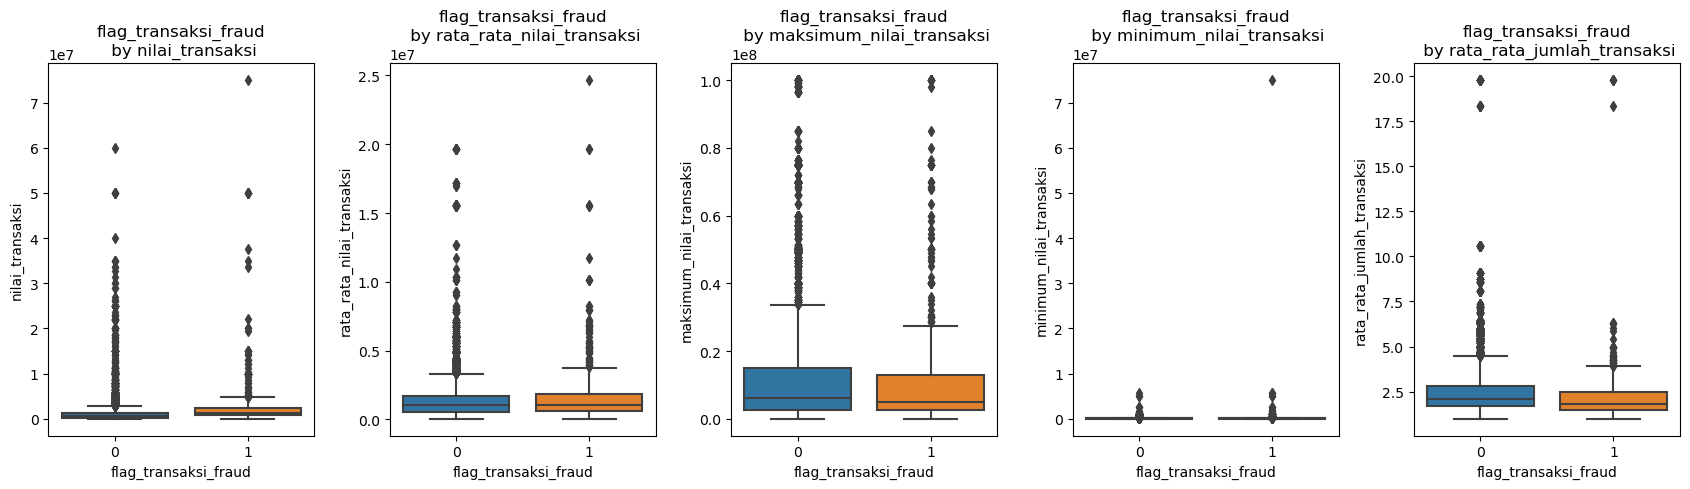

In [29]:
numeric_columns = ['nilai_transaksi','rata_rata_nilai_transaksi', 'maksimum_nilai_transaksi', 'minimum_nilai_transaksi', 'rata_rata_jumlah_transaksi']

fig, axes = plt.subplots(1, len(numeric_columns), figsize=(17, 5))
for idx, cat_col in enumerate(numeric_columns):
    sns.boxplot(y=cat_col, data=train, x='flag_transaksi_fraud', ax=axes[idx])
    axes[idx].set_title(f'flag_transaksi_fraud\n by {cat_col}')
    axes[idx].set_xlabel('flag_transaksi_fraud')
    axes[idx].set_ylabel(cat_col)

plt.tight_layout()
plt.show()

Dari plot tersebut, dapat kita lihat beberapa outlier dari masing-masing atribut. Outlier adalah suatu titik atau kumpulan titik yang berbeda dengan titik lainnya. Terkadang nilainya bisa sangat tinggi atau sangat rendah. Karena outlier adalah salah satu alasan utama yang menghasilkan model yang kurang akurat. Oleh karena itu, akan dilakukan Metode IQR untuk menghapusnya.

IQR adalah perbedaan antara kuartil ketiga (Q3) dan kuartil pertama (Q1). Outliers biasanya dianggap sebagai data yang berada di luar rentang (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

In [30]:
def remove_outliers(train, columns):
    for column in columns:
        Q1 = train[column].quantile(0.25)
        Q3 = train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        train = train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]
    return train

outlier_columns = [
    "nilai_transaksi",
    "rata_rata_jumlah_transaksi",
    "minimum_nilai_transaksi",
    "maksimum_nilai_transaksi",
    "rata_rata_nilai_transaksi",
]

train = remove_outliers(train, outlier_columns)

In [31]:
train.shape

(9326, 15)

Sekarang kita akan lihat lagi plot setelah dilakukan penghapusan outliers

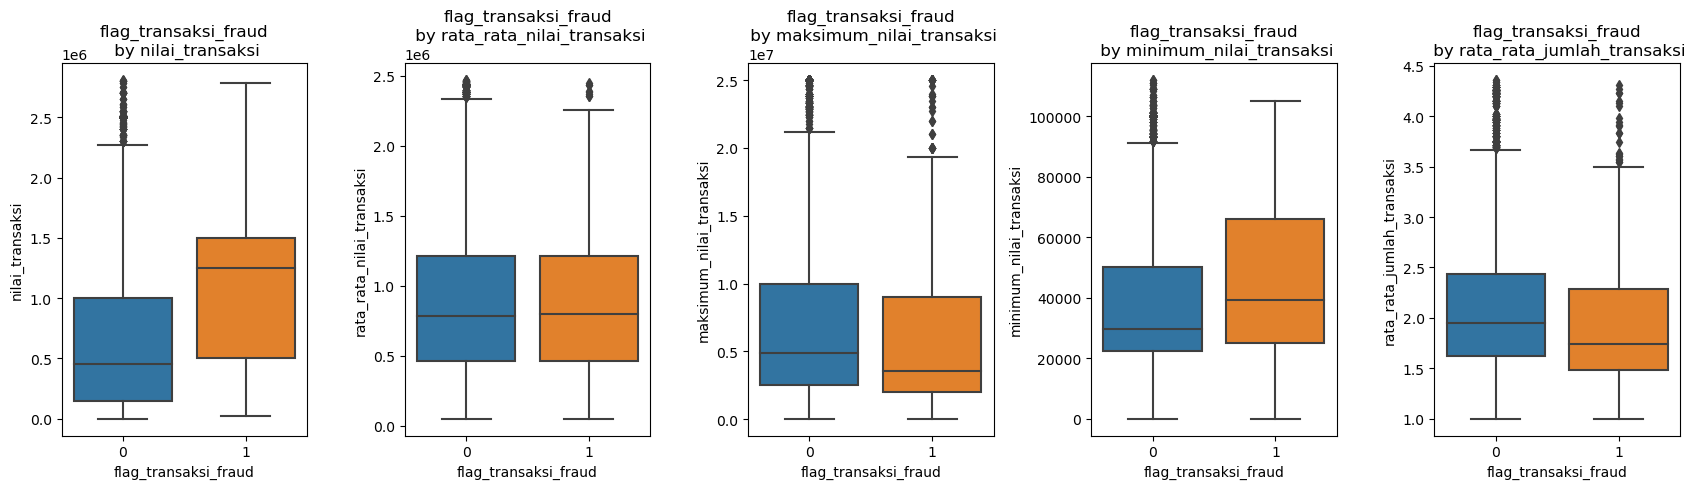

In [32]:
numeric_columns = ['nilai_transaksi','rata_rata_nilai_transaksi', 'maksimum_nilai_transaksi', 'minimum_nilai_transaksi', 'rata_rata_jumlah_transaksi']

fig, axes = plt.subplots(1, len(numeric_columns), figsize=(17, 5))
for idx, cat_col in enumerate(numeric_columns):
    sns.boxplot(y=cat_col, data=train, x='flag_transaksi_fraud', ax=axes[idx])
    axes[idx].set_title(f'flag_transaksi_fraud\n by {cat_col}')
    axes[idx].set_xlabel('flag_transaksi_fraud')
    axes[idx].set_ylabel(cat_col)

plt.tight_layout()
plt.show()

Dari plot tersebut terlihat bahwa nilai persebaran "nilai_transaksi" dan "minimum_nilai_transaksi" pada transaksi fraud cenderung lebih tinggi daripada transaksi normal. 

#### Multivariate Analysis

Multivariate analysis melibatkan tiga atau lebih variabel dalam analisisnya. Tujuannya adalah untuk memahami bagaimana variabel-variabel ini berinteraksi dan mempengaruhi satu sama lain.

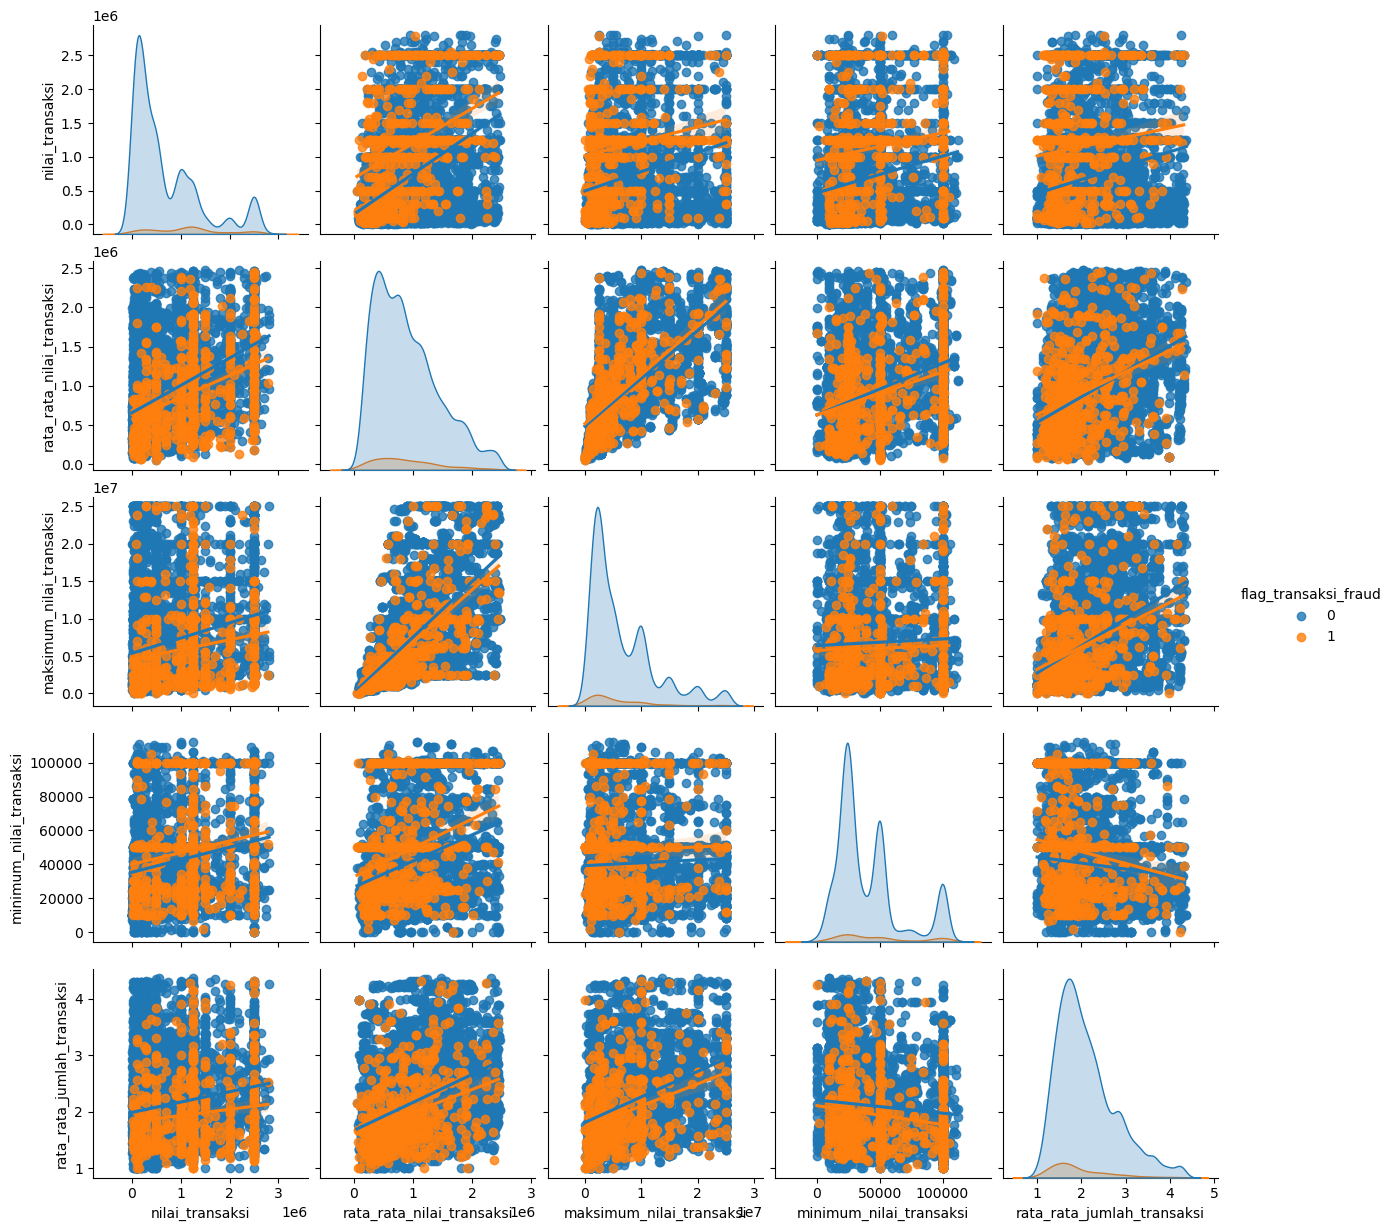

In [33]:
sns.pairplot(train, hue="flag_transaksi_fraud", vars=['nilai_transaksi','rata_rata_nilai_transaksi', 'maksimum_nilai_transaksi', 'minimum_nilai_transaksi', 'rata_rata_jumlah_transaksi'], kind='reg')

Heatmap

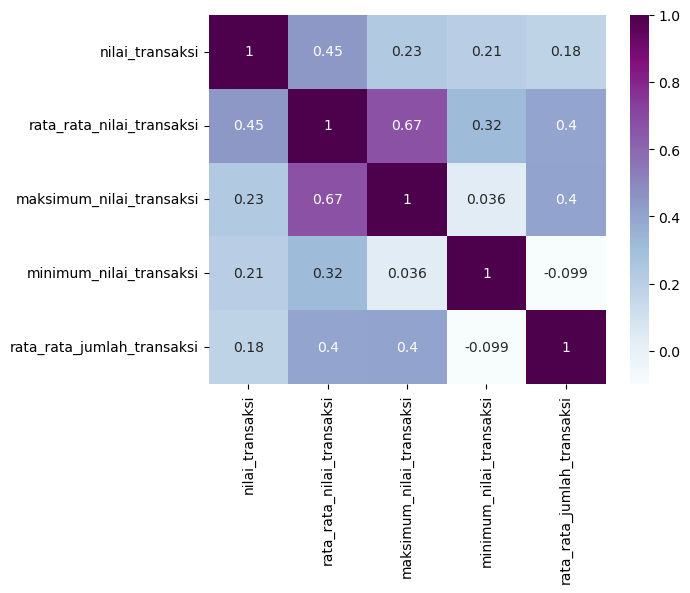

In [34]:
matrix = train[['nilai_transaksi','rata_rata_nilai_transaksi', 'maksimum_nilai_transaksi', 'minimum_nilai_transaksi', 'rata_rata_jumlah_transaksi']].corr()
sns.heatmap(matrix, cmap="BuPu",annot=True);

Dari plot tersebut kita dapat melihat korelasi yang paling kuat yaitu "maksimum_nilai_transaksi" dengan "rata_rata_nilai_transaksi"

#### Kesimpulan
Dalam kesimpulan, dataset transaksi finansial ini mengungkapkan ketidakseimbangan yang signifikan antara transaksi normal dan transaksi penipuan, dengan sekitar 93.18% transaksi normal dan 6.82% transaksi penipuan. Hal ini dapat berdampak negatif pada kinerja model dalam mendeteksi penipuan, sehingga penanganan ketidakseimbangan dataset perlu dipertimbangkan. Selain itu, analisis fitur kategori menunjukkan bahwa beberapa tipe transaksi, kepemilikan kartu, dan channel lebih cenderung terlibat dalam penipuan. Analisis numerik mengungkapkan adanya outlier dalam data, yang dihapus menggunakan metode IQR. Setelah penghapusan outlier, terlihat bahwa nilai persebaran "nilai_transaksi" dan "minimum_nilai_transaksi" pada transaksi fraud cenderung lebih tinggi daripada transaksi normal. Selain itu, ada korelasi positif kuat antara "maksimum_nilai_transaksi" dan "rata_rata_nilai_transaksi," yang dapat memberikan wawasan tambahan tentang karakteristik data. Namun, perlu diingat bahwa korelasi tidak selalu menunjukkan hubungan sebab-akibat, dan analisis lebih lanjut diperlukan untuk pemahaman yang lebih mendalam.

# 4. Model Building

#### Label Encoding
Mengonversi nilai kategori menjadi bilangan bulat. Setiap kategori diberi label unik dalam bentuk bilangan bulat.

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['flag_transaksi_fraud'] = label_encoder.fit_transform(train['flag_transaksi_fraud'])
list(label_encoder.classes_)

[0, 1]

#### Memisahkan Variable Feature dengan Variable Target

Buat variabel feature dengan droping variable target "flag_transaksi_fraud"

In [36]:
# isi X dengan variabel fiture
X = train.drop(columns=['flag_transaksi_fraud'])

In [37]:
X.head(2)

,tanggal_transaksi_awal,tipe_kartu,tipe_transaksi,nilai_transaksi,id_negara,nama_kota,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,id_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi
0,2457726,111,26,2200000.0,96,265,193955,4,2,9,1332292.784,9750000.0,10000.0,2.73
1,2457507,111,156,2500000.0,96,121,73140,2,1,8,1369047.619,10000000.0,30000.0,2.33


Simpan variabel target "flag_transaksi_fraud" di dataframe lain

In [38]:
# isi y dengan variabel target
y = train[['flag_transaksi_fraud']]

In [39]:
y.head(2)

,flag_transaksi_fraud
0,0
1,1


#### One Hot Encoding

Sekarang kita akan membuat variabel dummy untuk variabel kategorikal. Variabel dummy mengubah variabel kategorikal menjadi serangkaian angka 0 dan 1, sehingga lebih mudah untuk diukur dan dibandingkan.

Karena beberapa algoritma Machine Learning hanya menerima nilai numerik sebagai input, kita harus mengubah nilai kategori menjadi nilai numerik.

In [40]:
X = pd.get_dummies(X)

In [41]:
X.head(3)

,tanggal_transaksi_awal,nilai_transaksi,waktu_transaksi,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,tipe_kartu_0,tipe_kartu_1,tipe_kartu_2,tipe_kartu_3,tipe_kartu_4,tipe_kartu_5,tipe_kartu_24,...,nama_kota_283,nama_kota_284,nama_kota_288,nama_kota_293,kuartal_transaksi_1,kuartal_transaksi_2,kuartal_transaksi_3,kuartal_transaksi_4,kepemilikan_kartu_1,kepemilikan_kartu_2,id_channel_3,id_channel_4,id_channel_8,id_channel_9
0,2457726,2200000.0,193955,1.332293e+06,9750000.0,10000.0,2.73,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,2457507,2500000.0,73140,1.369048e+06,10000000.0,30000.0,2.33,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,2457746,320000.0,155117,7.117647e+05,6884408.0,10000.0,1.98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,1,0,0


#### Penanganan Data Imbalance
Terdapat ketimpangan antara data dengan target 1 dan 0 pada flag_transaksi_fraud. Kita akan menggunakan metode Resampling untuk menaikan jumlah data minoritas menggunakan Smote.

In [42]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
X, y = over.fit_resample(X, y)

Visualisasi variable target setalah dilakukan oversampling

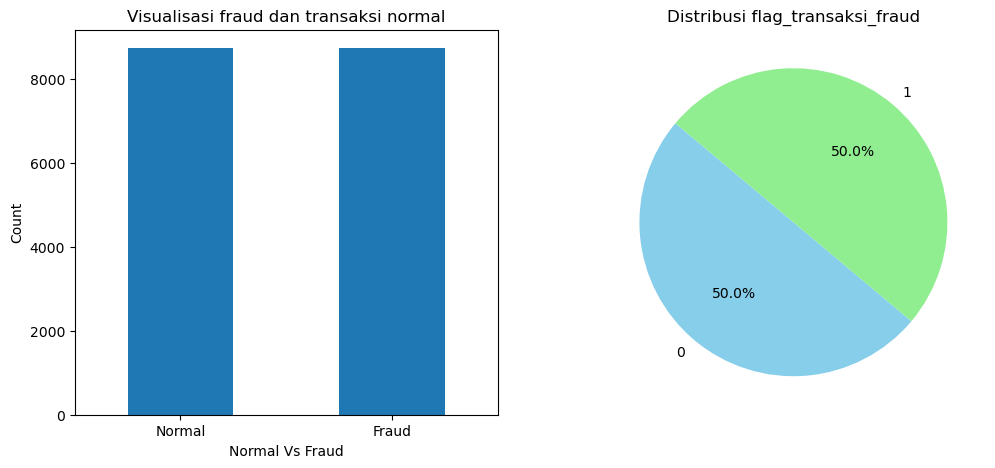

In [43]:
# Visualize
labels = ["Normal", "Fraud"]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
count_classes = y.value_counts(y['flag_transaksi_fraud'], sort=True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualisasi fraud dan transaksi normal")
plt.ylabel("Count")
plt.xlabel("Normal Vs Fraud")
plt.xticks(range(2), labels)

# Menghitung jumlah setiap nilai dalam kolom "flag_transaksi_fraud"
loan_status_counts = y['flag_transaksi_fraud'].value_counts()

# Membuat pie chart
plt.subplot(1, 2, 2)
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribusi flag_transaksi_fraud')
plt.show()

In [44]:
print(X.shape)
print(y.shape)

(17490, 293)
(17490, 1)


#### Split Data

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=1)

Dataset telah dibagi menjadi bagian pelatihan dan validasi.

Sebanyak 80% data akan digunakan untuk melatih model dan 20% data lainnya akan digunakan untuk memeriksa validasi model. 

### Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(x_train, y_train) #latih nb_model dengan metode fit() menggunakan data train
Y_pred = nb_model.predict(x_cv) #gunakan model untuk membuat prediksi menggunakan data X validasi
score_bayes = accuracy_score(y_cv, Y_pred) #buat skor akurasi dengan membandingkan hasil prediksi dengan data y validasi

print("Akurasi {}".format(score_bayes))
print(classification_report(y_cv, Y_pred))

Akurasi 0.6715265866209262
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1757
           1       0.68      0.65      0.66      1741

    accuracy                           0.67      3498
   macro avg       0.67      0.67      0.67      3498
weighted avg       0.67      0.67      0.67      3498



Untuk Naive Bayes Menghasilkan akurasi sebesar 0.6715265866209262 saat terkahir kali dicompile

### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100

print("Akurasi {}".format(score_tree))
print(classification_report(y_cv, Y_pred))
print(list(label_encoder.classes_))

Akurasi 93.73927958833619
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1757
           1       0.68      0.65      0.66      1741

    accuracy                           0.67      3498
   macro avg       0.67      0.67      0.67      3498
weighted avg       0.67      0.67      0.67      3498

[0, 1]


Untuk Decision Tree Menghasilkan akurasi sebesar 93.73927958833619

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
print("akurasi:",score_forest)
print(classification_report(y_cv, pred_cv_forest))

akurasi: 92.10977701543739
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1757
           1       0.95      0.89      0.92      1741

    accuracy                           0.92      3498
   macro avg       0.92      0.92      0.92      3498
weighted avg       0.92      0.92      0.92      3498



Model Random Forest menghasilkan akurasi sebesar 92.10977701543739

### XGBoost

In [49]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=50,max_depth=7)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))

Akurasi :  96.79817038307604
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1757
           1       0.98      0.96      0.97      1741

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498



Untuk akurasi XGBoost menghasilkan tingkat akurasi sebesar 96.79817038307604

#### Akurasi tiap model

Berikut hasil dari masing - masing model yang dimana XGBoost menghasilkan akurasi model paling tinggi dibanding yang lainnya.

In [50]:
df_acc = pd.DataFrame({'Naive_Bayes': [score_bayes], 'Decission_Tree': [score_tree],
                       'Random_Forest': [score_forest], 'XGBoost': [score_xgb]})
df_acc

,Naive_Bayes,Decission_Tree,Random_Forest,XGBoost
0,0.671527,93.73928,92.109777,96.79817


Confussion matrix dari model xgboost

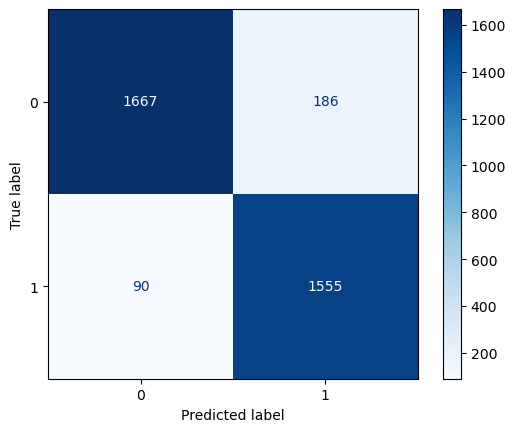

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(pred_cv_forest,y_cv)

# Menampilkan matriks kebingungan menggunakan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Important feature

In [51]:
feature_importances = pd.DataFrame(xgb_model.feature_importances_,index = x_train.columns, columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)


                     importance
kepemilikan_kartu_2    0.455591
kuartal_transaksi_2    0.048117
kuartal_transaksi_1    0.041275
kuartal_transaksi_4    0.038232
kepemilikan_kartu_1    0.024462
...                         ...
nama_kota_99           0.000000
nama_kota_100          0.000000
nama_kota_105          0.000000
nama_kota_107          0.000000
nama_kota_125          0.000000

[293 rows x 1 columns]


Terakhir merupakan fitur penting yang dimana angka kepentingan semakin tinggi, maka kepentingan dalam atribut semakin tinggi